In [1]:
from google.colab import files
import pandas as pd

file = files.upload()
data = pd.read_csv('melb_data.csv')

Saving melb_data.csv to melb_data.csv


**EDA (Exploratory Daya Analysis)**

In [3]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**Missing Values**

In [6]:
Missing_column = data.isnull().sum()
Missing_column

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [7]:
data.isnull().mean() * 100

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


Terdapat persentase missing values yang cukup besar pada BuildingArea(47%) dan YearBuilt(39%)

In [8]:
data[["BuildingArea","YearBuilt"]].dtypes

,0
BuildingArea,float64
YearBuilt,float64


**Handle Missing Values**



In [9]:
data = data.drop(columns=["Car","CouncilArea"])

In [12]:
from sklearn.model_selection import train_test_split

y = data.Price
X = data.drop("Price",axis=1)

TrainX,ValX,TrainY,ValY = train_test_split(X,y,test_size=0.2,
                                           random_state=42)

In [14]:
TrainX.shape, ValX.shape

((10864, 18), (2716, 18))

In [16]:
TrainY.shape, ValY.shape

((10864,), (2716,))

In [18]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy = "median")

TrainX[["BuildingArea","YearBuilt"]] = my_imputer.fit_transform(
    TrainX[["BuildingArea","YearBuilt"]]
)

ValX[["BuildingArea","YearBuilt"]] = my_imputer.transform(
    ValX[["BuildingArea","YearBuilt"]]
)

In [24]:
TrainX[["BuildingArea","YearBuilt"]].isna().sum()

,0
BuildingArea,0
YearBuilt,0


In [25]:
ValX[["BuildingArea","YearBuilt"]].isna().sum()

,0
BuildingArea,0
YearBuilt,0


In [30]:
TrainX.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
12796,Mount Waverley,37 Pascall St,4,h,S,Jellis,16/09/2017,14.2,3149.0,4.0,2.0,695.0,160.0,1970.0,-37.86127,145.14271,Eastern Metropolitan,13366.0
9642,Mount Waverley,23 Baily St,3,h,S,Ray,17/06/2017,14.2,3149.0,3.0,1.0,810.0,126.0,1970.0,-37.86838,145.14664,Eastern Metropolitan,13366.0
3207,Hawthorn,5/70 Power St,2,u,S,Jellis,25/02/2017,4.6,3122.0,2.0,1.0,82.0,126.0,1970.0,-37.81800,145.02680,Southern Metropolitan,11308.0
1698,Carlton North,24/635 Drummond St,2,u,S,hockingstuart,27/06/2016,3.2,3054.0,2.0,1.0,0.0,76.0,1975.0,-37.79020,144.97000,Northern Metropolitan,3106.0
761,Bentleigh,3 Somers St,4,h,S,Woodards,22/05/2016,13.0,3204.0,4.0,2.0,292.0,126.0,1970.0,-37.91480,145.02430,Southern Metropolitan,6795.0


**CLUSTERING WITH K-MEANS**

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=42)

TrainX["Cluster"] = kmeans.fit_transform(TrainX[["Lattitude","Longtitude"]])

ValX["Cluster"] = kmeans.transform(ValX[["Lattitude","Longtitude"]])

In [51]:
TrainX["Cluster"] = TrainX["Cluster"].astype("category")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="Longtitude",y="Lattitude",hue="Cluster",data = TrainX)

**Evaluasi Clustering**

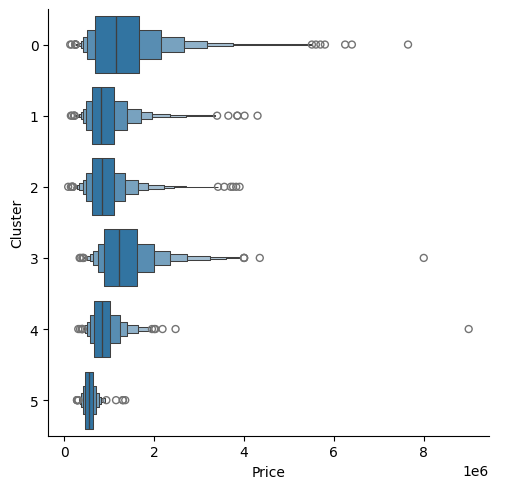

In [42]:
Fitur_Cluster["Price"] = data["Price"]

sns.catplot(x="Price",y="Cluster",data= Fitur_Cluster,kind="boxen")

In [45]:
Fitur_Cluster.drop("Price",axis=1)

,Lattitude,Longtitude,Cluster
12796,-37.86127,145.14271,3
9642,-37.86838,145.14664,3
3207,-37.81800,145.02680,0
1698,-37.79020,144.97000,1
761,-37.91480,145.02430,0
...,...,...,...
5191,-37.72170,144.99540,1
13418,-37.77796,144.98374,1
5390,-37.82480,144.99760,0
860,-37.92930,145.06570,0


In [46]:
cluster_join = Fitur_Cluster[["Cluster"]]

TrainX = TrainX.join(cluster_join)
ValX = ValX.join(cluster_join)

In [47]:
TrainX.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Cluster
12796,Mount Waverley,37 Pascall St,4,h,S,Jellis,16/09/2017,14.2,3149.0,4.0,2.0,695.0,160.0,1970.0,-37.86127,145.14271,Eastern Metropolitan,13366.0,3
9642,Mount Waverley,23 Baily St,3,h,S,Ray,17/06/2017,14.2,3149.0,3.0,1.0,810.0,126.0,1970.0,-37.86838,145.14664,Eastern Metropolitan,13366.0,3
3207,Hawthorn,5/70 Power St,2,u,S,Jellis,25/02/2017,4.6,3122.0,2.0,1.0,82.0,126.0,1970.0,-37.81800,145.02680,Southern Metropolitan,11308.0,0
1698,Carlton North,24/635 Drummond St,2,u,S,hockingstuart,27/06/2016,3.2,3054.0,2.0,1.0,0.0,76.0,1975.0,-37.79020,144.97000,Northern Metropolitan,3106.0,1
761,Bentleigh,3 Somers St,4,h,S,Woodards,22/05/2016,13.0,3204.0,4.0,2.0,292.0,126.0,1970.0,-37.91480,145.02430,Southern Metropolitan,6795.0,0


In [48]:
ValX.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Cluster
1061,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,588.0,126.0,1970.0,-37.9287,144.9920,Southern Metropolitan,10579.0,NaN
6482,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,0.0,83.0,2002.0,-37.8091,144.9520,Northern Metropolitan,2230.0,NaN
8395,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,115.0,1930.0,-37.8718,144.9767,Southern Metropolitan,13240.0,NaN
4659,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,146.0,106.0,2006.0,-37.7152,144.9346,Northern Metropolitan,7485.0,NaN
7386,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,462.0,126.0,1970.0,-37.8331,144.8715,Western Metropolitan,984.0,NaN
